In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rupakroy/online-payments-fraud-detection-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\vishh\.cache\kagglehub\datasets\rupakroy\online-payments-fraud-detection-dataset\versions\1


In [3]:
import pandas as pd
import os
file_name = "PS_20174392719_1491204439457_log.csv"
full_path = os.path.join(path, file_name)

In [4]:
df = pd.read_csv(full_path)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
##Checking for null values
null_count = df.isnull().sum()
null_count

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
## Checking for duplicated values
duplicate_values = df.duplicated().sum()
duplicate_values

0

In [7]:
## Checking the descriptive statistics of the data
description = df.describe()
description

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


Feature Engineering 

In [8]:
df['rule_flag'] = (
    (df['amount'] > df['amount'].quantile(0.95)) & 
    (df['type'] == 'TRANSFER') & 
    (df['oldbalanceOrg'] < df['amount']) 
)
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,rule_flag
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,False
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,False
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,False
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,False
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,False
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,False
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,False
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,False


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

In [10]:
print("\nData Info:")
print(df.info())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
 11  rule_flag       bool   
dtypes: bool(1), float64(5), int64(3), object(3)
memory usage: 540.0+ MB
None


In [11]:
# 4. Check Class Distribution
print("\nClass Distribution:")
print(df['isFraud'].value_counts(normalize=True) * 100)


# 5. Feature Selection (exclude identifiers or unnecessary columns)
features = ['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
X = df[features]
y = df['isFraud']


Class Distribution:
isFraud
0    99.870918
1     0.129082
Name: proportion, dtype: float64


In [12]:
X.columns

Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest'],
      dtype='object')

In [13]:
# Encoding the "type" column 
X = pd.get_dummies(X, columns=['type'], drop_first=True)

In [14]:
# 7. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [15]:
# 8. Build a Pipeline with StandardScaler and Logistic Regression
log_reg_pipeline = Pipeline([
('scaler', StandardScaler()),
('model', LogisticRegression(max_iter=1000))
])

In [16]:
# Train Logistic Regression
log_reg_pipeline.fit(X_train, y_train)
y_pred_lr = log_reg_pipeline.predict(X_test)

In [17]:
print("\n--- Logistic Regression Results ---")
print(classification_report(y_test, y_pred_lr))


--- Logistic Regression Results ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.90      0.35      0.51      2464

    accuracy                           1.00   1908786
   macro avg       0.95      0.68      0.75   1908786
weighted avg       1.00      1.00      1.00   1908786



In [18]:
# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=25, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [19]:
print("\n--- RandomForest Classifier Report ---")
print(classification_report(y_test, y_pred_rf))


--- RandomForest Classifier Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.96      0.78      0.86      2464

    accuracy                           1.00   1908786
   macro avg       0.98      0.89      0.93   1908786
weighted avg       1.00      1.00      1.00   1908786



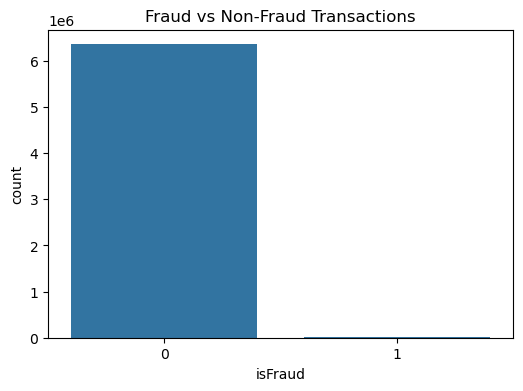

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(x='isFraud', data=df)
plt.title('Fraud vs Non-Fraud Transactions')
plt.show()

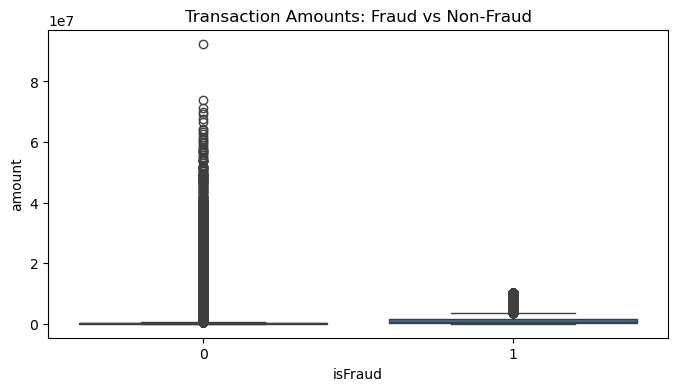

In [21]:
plt.figure(figsize=(8,4))
sns.boxplot(x='isFraud', y='amount', data=df)
plt.title('Transaction Amounts: Fraud vs Non-Fraud')
plt.show()

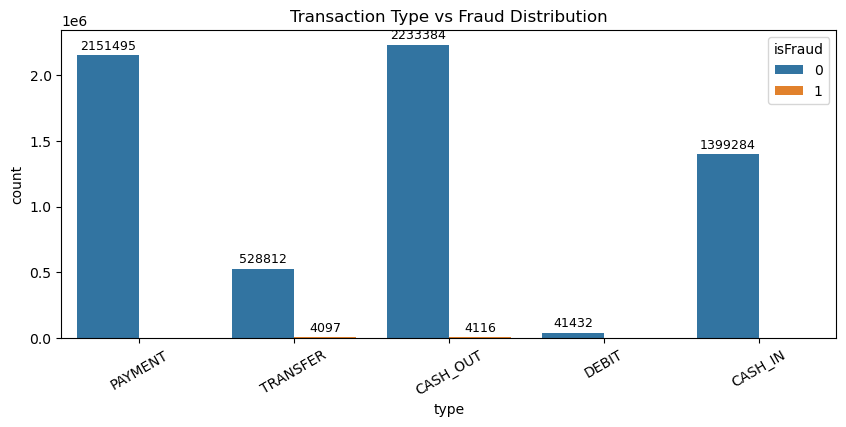

In [26]:
plt.figure(figsize=(10,4))
ax = sns.countplot(x='type', data=df, hue='isFraud')
for container in ax.containers: 
    ax.bar_label(container, fmt ='%d', label_type ='edge', fontsize = 9, padding = 2)
plt.title('Transaction Type vs Fraud Distribution')
plt.xticks(rotation=30)
plt.show()


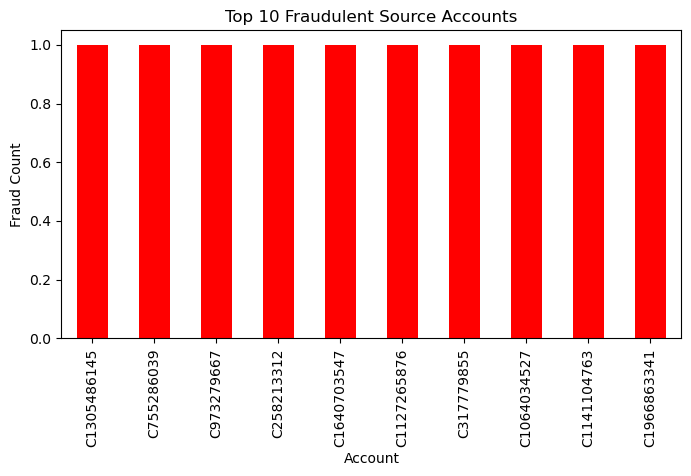

In [27]:
# 7. Suspicious Account Analysis
fraud_accounts = df[df['isFraud']==1]['nameOrig'].value_counts().head(10)
plt.figure(figsize=(8,4))
fraud_accounts.plot(kind='bar', color='red')
plt.title('Top 10 Fraudulent Source Accounts')
plt.xlabel('Account')
plt.ylabel('Fraud Count')
plt.show()

In [29]:
def investigative_summary(df):
    suspicious = df[(df['rule_flag']==True) | (df['isFraud']==1)].sample(5, random_state=42)
    summaries = []
    for i, row in suspicious.iterrows():
        summary = {
            'Transaction ID': i,
            'Type': row['type'],
            'Amount': row['amount'],
            'Old Balance': row['oldbalanceOrg'],
            'New Balance': row['newbalanceOrig'],
            'Flagged as Fraud': bool(row['isFraud']),
            'Rule Triggered': bool(row['rule_flag']),
            'Possible Reason': 'Large amount with low balance' if row['amount'] > df['amount'].quantile(0.95) else 'Unusual balance change'
        }
        summaries.append(summary)
    return pd.DataFrame(summaries)


summary_df = investigative_summary(df)
print("\nSample Investigative Case Summaries:")
print(summary_df)


Sample Investigative Case Summaries:
   Transaction ID      Type      Amount  Old Balance  New Balance  \
0         3013169  TRANSFER   939599.41          0.0          0.0   
1         5541373  TRANSFER   762553.20          0.0          0.0   
2         3893252  TRANSFER  3437094.38          0.0          0.0   
3         5086209  TRANSFER  1753688.77          0.0          0.0   
4         1390047  TRANSFER   713801.33      22243.0          0.0   

   Flagged as Fraud  Rule Triggered                Possible Reason  
0             False            True  Large amount with low balance  
1             False            True  Large amount with low balance  
2             False            True  Large amount with low balance  
3             False            True  Large amount with low balance  
4             False            True  Large amount with low balance  


In [30]:
# 9. Fraud Dashboard Metrics (summary stats)
total_txn = len(df)
total_fraud = df['isFraud'].sum()
fraud_percent = round((total_fraud / total_txn) * 100, 2)
rule_flags = df['rule_flag'].sum()


print("\n--- Dashboard Summary ---")
print(f"Total Transactions: {total_txn:,}")
print(f"Total Fraudulent: {total_fraud:,} ({fraud_percent}%)")
print(f"Transactions Flagged by Rules: {rule_flags:,}")
print(f"Top Fraud Types: {df[df['isFraud']==1]['type'].value_counts().to_dict()}")


# 10. Insights for Reporting
print("\nKey Insights:")
print("1️⃣ Most frauds occur in TRANSFER and CASH_OUT transactions.")
print("2️⃣ High-value transactions with insufficient balances show higher risk.")
print("3️⃣ Fraud appears sporadically but spikes around specific time steps.")
print("4️⃣ Rule-based detection can catch a portion of fraud but requires model-based refinement.")


print("\n✅ Fraud investigation & dashboard analysis complete.")


--- Dashboard Summary ---
Total Transactions: 6,362,620
Total Fraudulent: 8,213 (0.13%)
Transactions Flagged by Rules: 251,005
Top Fraud Types: {'CASH_OUT': 4116, 'TRANSFER': 4097}

Key Insights:
1️⃣ Most frauds occur in TRANSFER and CASH_OUT transactions.
2️⃣ High-value transactions with insufficient balances show higher risk.
3️⃣ Fraud appears sporadically but spikes around specific time steps.
4️⃣ Rule-based detection can catch a portion of fraud but requires model-based refinement.

✅ Fraud investigation & dashboard analysis complete.
